# **Task 3**
## **Aim - To perform Cat and Dog Classification**


#**Import Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from google.colab import files
from google.colab.patches import cv2_imshow


import pandas as pd
import numpy
import cv2
import os
import glob

#**File Upload**

In [4]:
uploaded= files.upload()

Saving image1.jpg to image1.jpg
Saving image2.jpg to image2.jpg
Saving image3.jpg to image3.jpg
Saving image4.jpg to image4.jpg


# **File Load from Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Prepare data for training and testing**

In [7]:
imagematrix = numpy.load("/content/drive/MyDrive/Colab Notebooks/insternship/matrix.npy")
imagelabels = numpy.load("/content/drive/MyDrive/Colab Notebooks/insternship/labels.npy")
(train_img, test_img, train_label, test_label) = train_test_split(imagematrix, imagelabels, test_size=0.2, random_state=50)

# **SVM Model in Sklearn**

In [17]:
model1 = SVC(max_iter=-1, kernel='linear', class_weight='balanced',gamma='scale')  # kernel linear is better Gausian kernel here
model1.fit(train_img, train_label)
acc1 = model1.score(test_img, test_label)
print("SVM model accuracy: {:.2f}%".format(acc1 * 100))

SVM model accuracy: 52.50%


# **KNN Model in Sklearn**

In [18]:
model2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model2.fit(train_img, train_label)
acc2 = model2.score(test_img, test_label)
print("KNN model accuracy: {:.2f}%".format(acc2 * 100))

KNN model accuracy: 49.64%


# **Prediction Sample**

Test Case 1
Prediction by SVM - cat
Prediction by KNN - cat


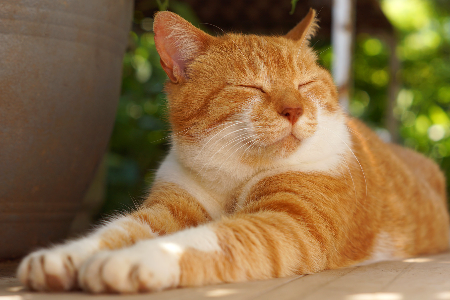

Test Case 2
Prediction by SVM - dog
Prediction by KNN - dog


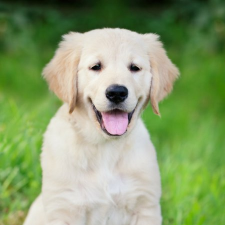

Test Case 3
Prediction by SVM - cat
Prediction by KNN - cat


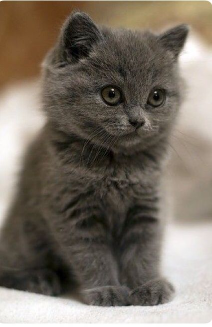

Test Case 4
Prediction by SVM - dog
Prediction by KNN - dog


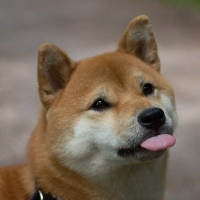

In [19]:
# Extract the image into vector
def image_vector(image, size=(128, 128)):
    return cv2.resize(image, size).flatten()


for t in range(1,5):
  img = cv2.imread("image{0}.jpg".format(t))
  pixel = image_vector(img)
  rawImage = numpy.array([pixel])
  prediction1 = model1.predict(rawImage)
  prediction2 = model2.predict(rawImage)
  print("Test Case {0}".format(t))
  print("Prediction by SVM - {0}".format(prediction1[0]))
  print("Prediction by KNN - {0}".format(prediction1[0]))
  w, h = len(img[0]), len(img)
  if w>1000:
    w, h = w//4, h//4
  else:
    w, h = w//2, h//2
  cv2_imshow(cv2.resize(img,(w,h)))